---

## Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service), for instance you could store your work on GitLab. You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Make sure your code is readable, organised, and commented appropriately.


## Team working 

Firstly agree amongst yourself how you are to work together as a group. 
- When will you meet? or will you work remotely from each other?
- How are you going to share code?
- How will you divide tasks?
- Who will present the final notebook, who will upload?
- When are you planning to work on the project?

The following tasks are all open-ended, so you should plan to work on them and investigate the problems raised and think about what you wish to cover. Because the task is open-ended you don't need to talk about every aspect of the problem to get a good mark - you should aim to present a coherent and well coded investigation into some aspects of each task though. The listed questions are a guide to some things you could think about to get you started, you don't need to answer them all, and you can certainly answer questions that are not listed.

When you are presenting your investigation of each problem, be sure to make a coherent discussion for each task (using markdown, maths as appropriate and code cells). In particular, since you are working as a group some work will be needed to make a single written response to the task combining all of the code and writing that you each contribute - this is something that you should plan to do and the quality of presentation will be marked.

## Task 1 - Analysing the product reviews

In this project, you are supposed to analyse product reviews and extract helpful information from them. The case we are studying here is the review dataset of women’s clothes that are sold by a company online. In the file `WomensApparelReviews.csv`, you are given over 23000 reviews that are real but anonymized. The columns of this dataset are the following variables:


**Product ID**: integer variable that refers to the specific item that is reviewed.

**Age**: the reviewers age.

**Title**: the title picked by the reviewer (some reviewers didn't pick any titles).

**Review Text**: the body text of the review.

**Rating**: the product score given by the customer from 1 (worst), to 5 (best).

**Is it Recommended?**: the customers are asked whether or not they recommend the product. 1 means the product is recommended, 0 means not recommended.

**Department**: the products are classified in different departments such as dress, top and ...

A major part of this task is analysing the review text and deciding how positive or negative it is. To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words, respectively. These words come from the paper by *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. You will need to invent a metric for how positive or negative "Review Text" is, based on how many of the words in it are in the positive/negative word lists. For instance, is a review containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the review. You can also decide if a "Title" is positive, negative or neutral by searching for them in the lists of positive and negative words. Once you have developed one positivity/negativity measure can you think of other measures that you could compare?

This project is open-ended, so you can come up with your own ideas to analyse the dataset and extract useful information or interesting facts. However at least one of the ideas you present should make use of the positive and negative word lists for analysing the reviews text. Here are some questions you might address in your analysis (of course you are not limited to just these questions):

- What is the age distribution of customers?
- What is the most popular item in each age group? (you can classify the ages however you think appropriate - be sure to justify what you do).
- Using the measure of negativity or positivity that you define, rate the reviews. You can also decide whether a title is positive or negative. Are the negativity-positivity of the titles and that of the review texts correlated? 
- What is the average rating in positive, negative or neutral reviews?
- Is the rating correlated to your measure of negativity-positivity? 
- Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
- Which product attracted the most positive reviews? This would help the company to focus more on the product that people liked or make changes to the product that people did not like. Is there any such advice you could give them on the products that could come from the reviews?
- What is the most recommended product? What is the least recommended product?
- Which group of reviewers wrote a longer text in their review? Do unhappy customers write longer reviews or satisfied customers? 
- Which age group uses more positive words? Which age group uses more negative words?
- Are older people more inclined to recommend a product or younger people?
- Is it true that unhappy customers use more capital letters? or it is the other way around?
- Can you come up with a way to consider the positive words in a negative statement negative? For example, "Not impressed or satisfied" is a negative title, but if you just count the positive and negative words, you will find two positive words ("impressed" and "satisfied") and a negative word ("not"). Hence, just based on the word count, you might wrongly find the title to be positive. This might be easier for the titles, but you can also break down the review text to sentences and apply your method there.


Import all the packages

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

(1) Age distribution

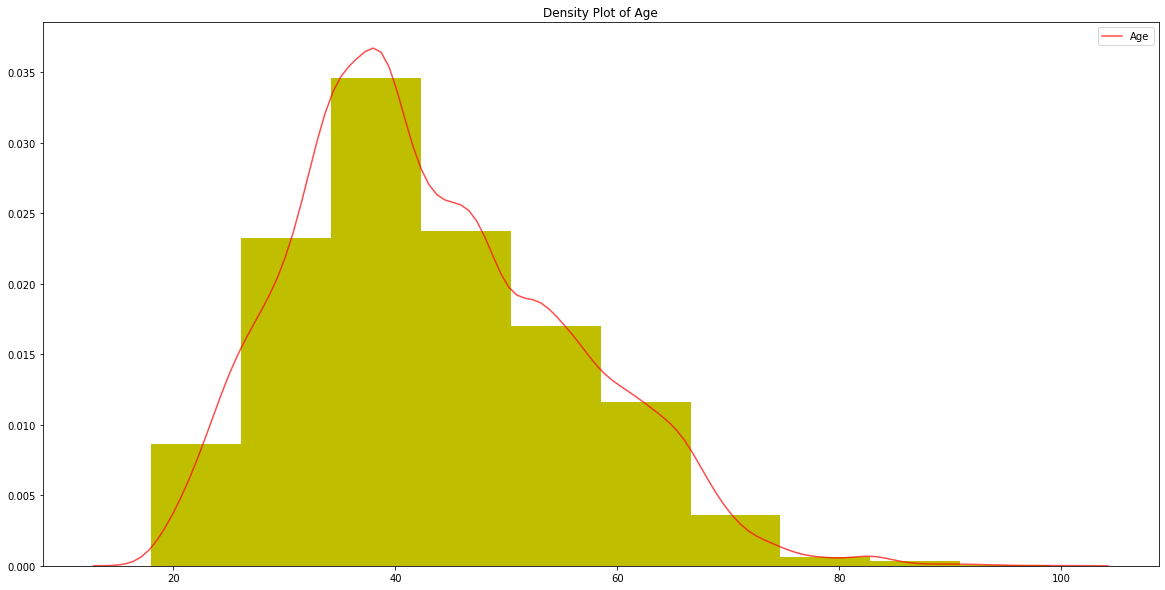

In [3]:
data = pd.read_csv('WomensApparelReviews.csv')
age = data.iloc[:,2]
plt.figure(figsize = (20,10))
plt.title('Density Plot of Age')
sns.kdeplot(age,alpha=.7,color = 'r')
plt.hist(age,density=True, color='y')
plt.show()

(2) The most popular item in each age group

We devide **Age** into four groups: [18,30]，(30,55]，(55,70] and (70,100].

In [26]:
age_groups = pd.cut(data['Age'], bins=[17,30,55,70,100])
data.groupby([age_groups,'Department']).size()

Age        Department
(17, 30]   Bottoms        501
           Dresses       1004
           Intimate       329
           Jackets        141
           Tops          1347
           Trend           14
(30, 55]   Bottoms       2651
           Dresses       4342
           Intimate      1167
           Jackets        662
           Tops          7021
           Trend           83
(55, 70]   Bottoms        596
           Dresses        884
           Intimate       216
           Jackets        205
           Tops          1909
           Trend           20
(70, 100]  Bottoms         51
           Dresses         89
           Intimate        23
           Jackets         24
           Tops           191
           Trend            2
dtype: int64

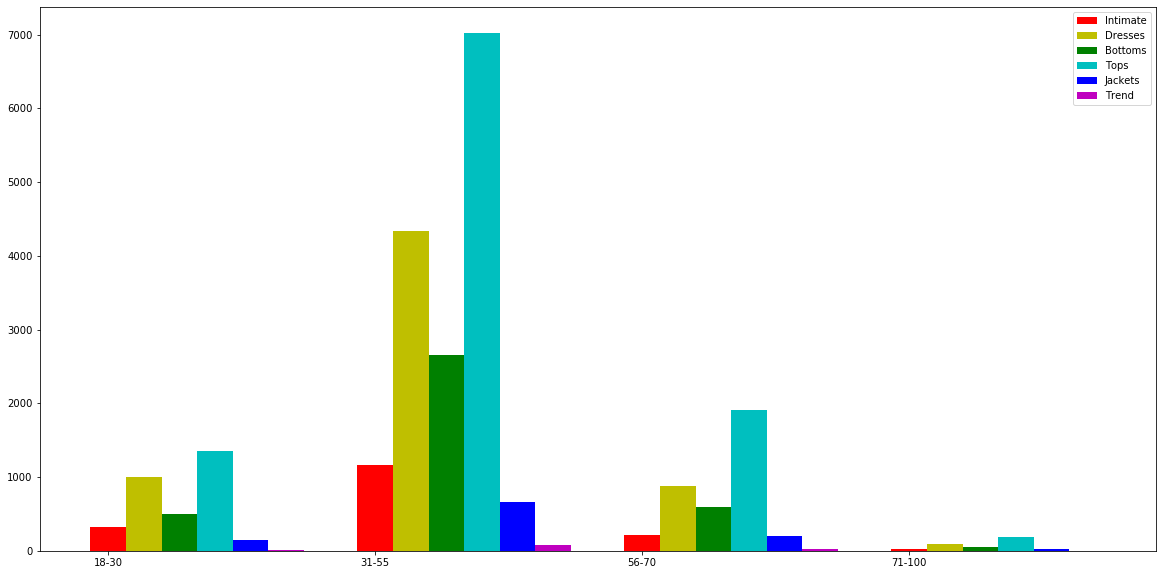

In [29]:
age_group = ['18-30', '31-55', '56-70', '71-100']
Intimate =[329, 1167, 216, 23]
Dresses = [1004, 4342, 884, 89]
Bottoms =[501, 2651, 596, 51]
Tops =[1347, 7021, 1909, 191]
Jackets =[141, 662, 205, 24]
Trend =[14, 83, 20, 2]
#Draw the cumulative distribution histogram
x = list(range(len(age_group)))
width = 0.8/6
plt.figure(figsize = (20,10))
plt.bar(x, Intimate, width=width, label='Intimate', tick_label=age_group, fc='r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Dresses, width=width, label='Dresses', fc='y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Bottoms, width=width, label='Bottoms', fc='g')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Tops, width=width, label='Tops', fc='c')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Jackets, width=width, label='Jackets', fc='b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Trend, width=width, label='Trend', fc='m')
plt.legend()
plt.show()

As we can see from the figure above, in group [18,30] the most popular item is **Tops**, in group [31,55] the most popular item is **Tops**, in group [56,70] the most popular item is **Tops** and in group [71,100] the most popular item is **Tops**.

(3) The correlation between negativity-positivity of the titles and that of the review texts

Measurement of negativity or positivity to rate reviews: we use the number of positive words and negative words as a measurement. If the number of positive words >  number of negative words, the rate of reviwe equals 1. If  number of positive words =  number of negative words, the rate of reviwe equals 0. If  number of positive words <  number of negative words, the rate of reviwe equals -1.

Measurement of negativity or positivity of the title is same as above.

In [5]:
def tokenize(s):
    '''
    To find all the English words without punctuations.
    '''
    return re.findall('[a-z]+', s)

#Read all the positive words and save them in a list
positiveword = []
with open ('positive-words.txt','r') as f1:
    for line in f1:
        positiveword.append(line.strip('\n'))
#Read all the negative words and save them in a list
negativeword = []
with open ('negative-words.txt','r') as f2:
    for line in f2:
        negativeword.append(line.strip('\n'))

def positivenum(text):
    '''
    calculate the positive-word numbers
    '''
    positivenum = 0
    for word in text:
        if word in positiveword:
            positivenum += 1  
    return positivenum

def negativenum(text):
    '''
    calculate the negative-word numbers
    '''
    negativenum = 0
    for word in text:
        if word in negativeword:
            negativenum += 1  
    return negativenum

def score(x,y):
    '''
    Judge the positivity and negativity according to the positive-word and negative-word numbers 
    and save the score in a list
    '''
    p = positivenum(y)
    n = negativenum(y)
    if p > n:
        x.append(1)
    if p == n:
        x.append(0)
    if p < n:
        x.append(-1)   
    return x

#Calculate the number of positive words and negative words and judge the positivity and negativity of review 
#and title
review = []
title = []
for i in range(len(data['Review Text'])):
    reviewlist = tokenize(str(data['Review Text'][i]).lower())
    titlelist = tokenize(str(data['Title'][i]).lower())
    #some reviewers didn't pick any titles or reviews, so I need to make sure there exisit title and review.
    if len(reviewlist) != 0 and len(titlelist) != 0:
        #Establish the -1,0,1 score of review
        score(review,reviewlist)
        #Establish the -1,0,1 score of title
        score(title,titlelist)
    else:
        review.append('na')
        title.append('na')

review_without_na = [x for x in review if x != 'na']
title_without_na = [x for x in title if x != 'na']
print(np.corrcoef(review_without_na,title_without_na))

[[1.         0.24790756]
 [0.24790756 1.        ]]


The correlation coefficient between negativity-positivity of the titles and that of the review texts is 0.248 which indicates a weak positive linear relationship between them.

(4) The average rating in positive, negative or neutral reviews

In [52]:
positive_rating = []
negative_rating = []
neutral_rating = []
#Established respectively the rating of positive, negative and neutral reviews
for i in range(len(review)):
    if review[i] == 1:
        positive_rating.append(data['Rating'][i])
    if review[i] == -1:
        negative_rating.append(data['Rating'][i])
    if review[i] == 0:
        neutral_rating.append(data['Rating'][i])  

def ave(sum,y):
    '''
    calculate the average ranting
    '''
    sum = 0
    for i in range(len(y)):
        sum += y[i]
    return sum/len(y)    

#the average rating in positive reviews
positive_ave = ave(sum,positive_rating)
#the average rating in negative reviews
negative_ave = ave(sum,negative_rating)
#the average rating in neutral reviews
neutral_ave = ave(sum,neutral_rating)

print(positive_ave)
print(negative_ave)
print(neutral_ave)

4.313922155688623
2.915798611111111
3.8080279232111693


The average rating in positive review is 4.313922155688623. The average rating in negative review is 2.915798611111111. The average rating in neutral review is 3.8080279232111693.

(5) Correlation between my measure of negativity-positivity and rating

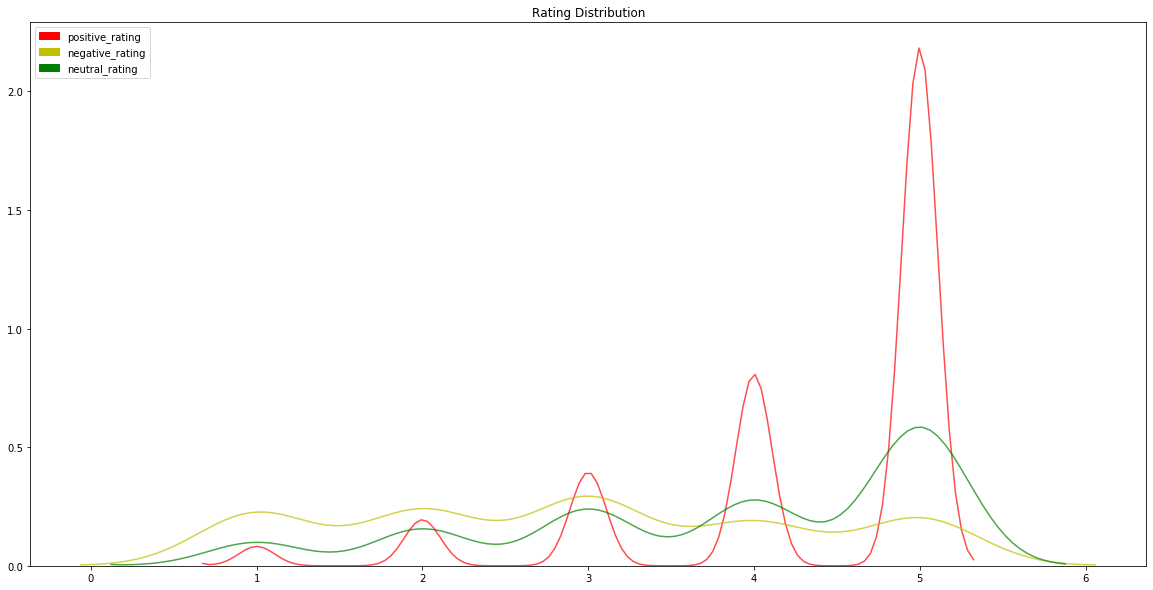

In [48]:
plt.figure(figsize = (20,10))
plt.title('Rating Distribution')
sns.kdeplot(positive_rating,alpha=.7,color = 'r')
sns.kdeplot(negative_rating,alpha=.7,color = 'y')
sns.kdeplot(neutral_rating,alpha=.7,color = 'g')

label_patches = [mpatches.Patch(color='r',label='positive_rating'),
                 mpatches.Patch(color='y',label='negative_rating'),
                 mpatches.Patch(color='g',label='neutral_rating')]
plt.legend(handles=label_patches, loc='upper left')
plt.show()

(6) Outliers who wrote a negative text but left a high rating (or vice versa)

In [59]:
data['Rating'][i]
negative_high = 0
positive_low = 0
for i in range(len(review)):
    #compare the rating with positive average
    if review[i] == 0 and data['Rating'][i] >= positive_ave:
        negative_high += 1
    #compare the rating with negative average
    if review[i] == 1 and data['Rating'][i]<= negative_ave:
        positive_low += 1
print(negative_high)
print(positive_low)

991
1511


991 people wrote a negative text but left a high rating. 1511 people wrote a positive text but left a low rating

(7) The product attracted the most positive reviews

In [61]:
product_id = data.iloc[:,1]
# Establish a dictionary to save each product with the number of positive reviews
product = {}
for i in set(product_id):
    product[i] = []

for i in range(len(product_id)):
    reviewlist = tokenize(str(data['Review Text'][i]).lower())
    titlelist = tokenize(str(data['Title'][i]).lower())
    if len(reviewlist) != 0 and len(titlelist) != 0:
        if review[i] == 1:
            product[product_id[i]].append(1)
#calculate the number of positive reviews
for i in set(product_id):
    product[i] = len(product[i])
#According to the descending order find the product with most positive reviews
most_positive_product = sorted(product.items(),key=lambda t:t[1],reverse=True)[0]
print(most_positive_product)

(1078, 873)


The product attracted the most positive reviews is product 1078 with 873 positive reviews.

(8) What is the most recommended product? What is the least recommended product?

The data is grouped according to the ‘Product ID’, before ‘Is it Recommended?’ is summed in each group. After resetting the index, rename ‘Is it Recommended?’ to ‘Times of Recommendation’(due to the sum of the column is the times that each product was recommended). Take the row where the largest value of 'Times of Recommendation' is located.

In [6]:
# Calculate the times that each product was recommended
recommend_times = data.groupby('Product ID').agg({'Is it Recommended?':
                                                  'sum'}).reset_index().rename(columns = {'Is it Recommended?':'Times of Recommendation'})
# The most recommended product
most_recommended = recommend_times.nlargest(1,'Times of Recommendation')
most_recommended

,Product ID,Times of Recommendation
1078,1078,841


Extract the 'Product ID' and 'Times of Recommendation' from the dataframe most_recommended, called ‘most_recommended_id’ and ‘most_recommended_time’. Then print out the conclusion.

In [7]:
# Extract the 'Product ID' and 'Times of Recommendation' 
most_recommended_id = list(most_recommended['Product ID'])
most_recommended_time = int(most_recommended['Times of Recommendation'])
# conclusion
print("The most_recommended products are", most_recommended_id, 'which were recommended'
      , most_recommended_time, 'times.')

The most_recommended products are [1078] which were recommended 841 times.


As for the least recommended products, the number of them is greater than 1. So, a different method is selected. 

-First we find the rows with the minimum value of 'Times of Recommendation' in the dataframe recommend_times and arrange them in ascending order according to ‘Product ID’.

-Then, extract the 'Product ID' and 'Times of Recommendation' from the dataframe least_recommended, called ‘least_recommended_id’ and ‘least_recommended_time’ seperately.

-Finally, print out the conclusion.

In [9]:
# The least recommended product
least_recommended = recommend_times[recommend_times['Times of Recommendation'] 
                                    == recommend_times['Times of Recommendation'].min()]
least_recommended = least_recommended.sort_values(['Product ID'],ascending = True)
# Extract the 'Product ID' and 'Times of Recommendation' 
least_recommended_id = list(least_recommended['Product ID'])
least_recommended_time = int(recommend_times['Times of Recommendation'].min())
# Conclusion
print("The least recommended products are", least_recommended_id, 'which were recommended', 
      least_recommended_time, 'times.')

The least recommended products are [11, 18, 53, 63, 80, 87, 91, 94, 95, 96, 104, 106, 110, 114, 118, 153, 174, 178, 179, 185, 192, 197, 207, 210, 214, 218, 219, 220, 233, 235, 236, 246, 259, 266, 269, 273, 280, 284, 285, 305, 348, 369, 371, 389, 399, 410, 413, 414, 421, 429, 432, 434, 438, 521, 523, 559, 567, 572, 610, 635, 653, 669, 673, 702, 725, 727, 730, 734, 735, 743, 751, 758, 759, 764, 765, 766, 776, 797, 806, 812, 814, 852, 885, 894, 913, 951, 972, 973, 982, 1023, 1127, 1158, 1160, 1165, 1169, 1175, 1176, 1195, 1200] which were recommended 0 times.


(9) Which group of reviewers wrote a longer text in their review? Do unhappy customers write longer reviews or satisfied customers?

We use the value of ‘Is it Recommended?’(1 or 0) as an indicator to judge the shopping experience(happy or unhappy) and the length of review refers to the number of words in the review.

Obviously, some people do not write a comment about product. In order to avoid the appearance of NaN, we choose to use 0 instead of the review length. For customers who write a comment, calculate the the number of words used in that review which is then append in a list called 'reviewlength'.

In order to visually show the differences between unhappy and satisfied customers, a new column called ‘review length’ is created. Subsequently, data is grouped by 'Is it Recommended?', and the mean of 'review length' in each group is calculated.We use the ‘recommend’(1 or 0) as an indicator to judge the shopping experience(happy or unhappy).

In [10]:
# Calculate the the number of words used in that review
reviewlength  = []
for review in data['Review Text']:
    # Avoid the appearance of NaN
    if pd.isnull(review):
        reviewlength.append(0)
        continue
    reviewlength.append(len(str(review).split(' ')))
# Created a new column called ‘review length’.
data['review length'] = pd.Series(reviewlength)
# The mean of 'review length' in each group
data.groupby('Is it Recommended?').agg({'review length':'mean'}).rename(columns = {'review length':'average review length'})

,average review length
Is it Recommended?,
0,60.966922
1,57.417987


As shown in the dataframe above, unhappy customers (i.e. customers who do not recommend products) use more words to review on products.

(10) Which age group uses more positive words? Which age group uses more negative words?

In this question, we believe that we'd better use the proportion of the number of positive words(negative words) in the total number of words in each review rather than directly calculating the number of positive words(negative words) in each review.

Calculate positive_word_num and negative_word_num, before dividing by the total number of words in each 'Review Text'. Similarly, to avoid NaN, we replace it with 0. Then new columns called 'precent of positive word' and 'percent of negative word' are created.

Use pd.cut to segment 'Age'. Basically, we divided the 'Age' into four parts as above. After the data is grouped by age group, we can then calculate the mean of 'precent of positive word' for each group.  

In [11]:
positive_word_num = []
negative_word_num = []
# Calculate positive_word_num and negative_word_num
for review in data['Review Text']:
    if pd.isnull(review):
        positive_word_num.append(0)
        negative_word_num.append(0)
        continue
    text = tokenize(str(review).lower())
    positive_word_num.append(positivenum(text))
    negative_word_num.append(negativenum(text))
# Created new columns   
data['precent of positive word'] = pd.Series(positive_word_num)/data['review length']
data['percent of negative word'] = pd.Series(negative_word_num)/data['review length']
# Divided the 'Age' into four parts
age_groups = pd.cut(data['Age'], bins=[17,30,55,70,np.inf])
# Calculate the mean of 'precent of positive word' for each group.
pd.DataFrame(data.groupby(age_groups)['precent of positive word'].mean())

,precent of positive word
Age,
"(17.0, 30.0]",0.088798
"(30.0, 55.0]",0.088626
"(55.0, 70.0]",0.090956
"(70.0, inf]",0.092495


The 'precent of negative word' is just the same as the above.

In [14]:
# Calculate the mean of 'precent of negative word' for each group.
pd.DataFrame(data.groupby(age_groups)['percent of negative word'].mean())

,percent of negative word
Age,
"(17.0, 30.0]",0.018629
"(30.0, 55.0]",0.018708
"(55.0, 70.0]",0.018234
"(70.0, inf]",0.018989


According to the two dataframe, it is clearly to say that women aged above 70 are more likely to use positive word. At the same time, they also uses more negative words. 

(11) Are older people more inclined to recommend a product or younger people?

The data is grouped according to the age_groups, before ‘Is it Recommended?’ is summed in each group. At this time, we get a column named 'age_recommended_num' which calculate the number of people recommend the product in each group.

If the data is grouped according to the age_groups, we can count the number of each age group.

'percent of recommend' records the ratio of two columns.

In [15]:
# Calculate the number of people recommend the product in each age group
age_recommended_num = data.groupby(age_groups)['Is it Recommended?'].sum()
# Count the number of each age group
age_num = data.groupby(age_groups).size()
pd.DataFrame(age_recommended_num/age_num).rename(columns = {0:'percent of recommend'})

,percent of recommend
Age,
"(17.0, 30.0]",0.814260
"(30.0, 55.0]",0.816790
"(55.0, 70.0]",0.851697
"(70.0, inf]",0.831579


In terms of the overall trend, the percentage of youngest group smaller than the older group. That is, older people are more inclined to recommend a product.

(12) Is it true that unhappy customers use more capital letters? or it is the other way around?

- For capital letters:

First, define a function called 'capital' to calculate the number of the capital letters in the text(argument)

Then, calculate the percent of capital number in the total length of review. Replace the NaN with 0.  Let the list be the new column in data.

Finally, the data is grouped by 'Is it Recommended?', then get the mean of the column 'percent of capital word' for each group.

In [16]:
def capital(text):
    '''
    Calculate the number of the capital letters in the text(argument)
    '''
    capitalnum = 0
    if len(text) != 0:
        for letter in text:
            if (letter >= 'A') and (letter <= 'Z') :
                capitalnum += 1
    return capitalnum
# Calculate the percent of capital number in the total length of review
capitalpercent = []
for review in data['Review Text']:
    # Avoid NaN
    if pd.isnull(review):
        capitalpercent.append(0)
        continue
    capitalnum = capital(review)
    if capitalnum != 0:
        capitalpercent.append(capitalnum/len(review))
# A new column is created.
data['percent of capital word'] = pd.Series(capitalpercent) 
# Get the mean of the column 'percent of capital word' for each group.
pd.DataFrame(data.groupby('Is it Recommended?')['percent of capital word'].mean())

,percent of capital word
Is it Recommended?,
0,0.004464
1,0.004467


As showed above, there are no significant differences between the capital letters used in the two groups. So there is not enough evidence to show unhappy customers use more capital letters.

We tried the other two methods:

- Do unhappy customers use more exclamation marks？
- Do unhappy customers use more question marks？

The calculation method is very similar to the method above, except that the number of uppercase letters is changed to the number of exclamation marks (question marks).

In [18]:
# other way
qupercent = []
expercent = []
for review in data['Review Text']:
    if pd.isnull(review):
        qupercent.append(0)
        expercent.append(0)
        continue
    qunum = review.count('?')
    exnum = review.count('!')
    qupercent.append(qunum)
    expercent.append(exnum)
        
data['number of question mark'] = pd.Series(qupercent)
data['number of exclamation mark'] = pd.Series(expercent)
# Question marks        
pd.DataFrame(data.groupby('Is it Recommended?')['number of question mark'].mean())

,number of question mark
Is it Recommended?,
0,0.049856
1,0.028684


There are significant differences between the question marks used in the two groups. 

Obviously, dissatisfied customers use more question marks. Therefore, a guess can be made: unhappy customers use question mark to indicate that the products do not meet expectations.

In [19]:
# exclamation mark
pd.DataFrame(data.groupby('Is it Recommended?')['number of exclamation mark'].mean())

,number of exclamation mark
Is it Recommended?,
0,0.308485
1,0.680801


As showed above, there are no significant differences between the exclamation mark used in the two groups. So there is not enough evidence to show unhappy customers use more exclamation marks.

(13) Can you come up with a way to consider the positive words in a negative statement negative? For example, "Not impressed or satisfied" is a negative title, but if you just count the positive and negative words, you will find two positive words ("impressed" and "satisfied") and a negative word ("not"). Hence, just based on the word count, you might wrongly find the title to be positive. This might be easier for the titles, but you can also break down the review text to sentences and apply your method there.


**algorithm design**

Step 1: Read the review and segment the review.

Step 2: Find the emotional words of the clause, record positive or negative, and position.

Step 3: Look for the word before the emotional word and find all the deny word. If the number is odd, multiply by -1. If it is even, multiply by 1.

Step 4: Calculate the emotional value of all the clauses of a review, and record it with an array.

Step 5: Calculate and record the emotion value of review.

Reference:https://cloud.tencent.com/developer/article/1059675

In [20]:
def replacer(s):
    '''
    replace n't with not.
    consider 'or' in a negative statement.
    '''
    s = re.sub('n\'t ', ' not ', s)
    for word in s.split(' '):
        if word in deny_word:
            s = re.sub(' or ', ' not ', s)
    return s
    

# Deny word dictionary
deny_word = ['no','never','little','few','none','neither','seldom','hardly','not']
# Determine the number of deny words
def judgeodd(num):
    if (num % 2) == 0:
        return 'even'
    else:
        return 'odd'


def emotion(text):
    '''
    Calculate emotional value
    '''
    count1 = []
    count2 = []
    if len(text)<1:
        return 0
    review = replacer(text)
    for sen in review.split('.'): # Loop through each clause
        if len(sen)<1:
            continue
        i = 0 # Record the location of the scanned word
        a = 0 # Record the location of emotional word
        poscount = 0 # First score of positive word
        poscount2 = 0 # Score after reversaling of positive word 
        poscount3 = 0 # Final score of positive word
        negcount = 0
        negcount2 = 0
        negcount3 = 0
        segtmp = tokenize(str(sen).lower())
        for word in segtmp:# Word segmentation, return as a list
            if word in positiveword:  # Determine whether a word is an emotional word
                poscount += 1
                c = 0
                for w in segtmp[a:i]:
                    if w in deny_word:
                        c += 1
                if judgeodd(c) == 'odd': # The number of deny words in front of the scanning emotion word
                    poscount *= -1.0
                    poscount2 += poscount
                    poscount = 0
                    poscount3 = poscount + poscount2 + poscount3
                    poscount2 = 0
                else:
                    poscount3 = poscount + poscount2 + poscount3
                    poscount = 0
                a = i + 1  # Change in the position of emotional words
            elif word in negativeword:  # Analysis of negative emotions, same as the above
                negcount += 1
                c = 0
                for w in segtmp[a:i]:
                    if w in deny_word:
                        c += 1
                if judgeodd(c) == 'odd': # The number of deny words in front of the scanning emotion word
                    negcount *= -1.0
                    negcount2 += negcount
                    negcount = 0
                    negcount3 = negcount + negcount2 + negcount3
                    negcount2 = 0
                else:
                    negcount3 = negcount + negcount2 + negcount3
                    negcount = 0
                a = i + 1  # Change in the position of emotional words
            i += 1

            # The following is the case to prevent negative numbers
            pos_count = 0
            neg_count = 0
            if poscount3 < 0 and negcount3 >= 0:
                neg_count += negcount3 - poscount3
                pos_count = 0
            elif negcount3 < 0 and poscount3 >= 0:
                pos_count = poscount3 - negcount3
                neg_count = 0
            elif poscount3 < 0 and negcount3 < 0:
                neg_count = -poscount3
                pos_count = -negcount3
            else:
                pos_count = poscount3
                neg_count = negcount3

            count1.append([pos_count, neg_count])
        count2.append(count1)
        count1 = []
    Pos = 0
    Neg = 0
    # Calculate the required positive emotion value, negative emotion value
    for emotion_list in count2:
        if len(emotion_list)<1:
            continue
        score_array = np.array(emotion_list)
        Pos += np.sum(score_array[:, 0])
        Neg += np.sum(score_array[:, 1])
    score = [Pos, Neg]
    return score

# For example
score = emotion(data['Review Text'][6])
if score[0]-score[1]>0:
    print('It is positive.')
elif score[0]-score[1]<0:
    print('It is negative.')
else:
    print('Not sure')

It is negative.


(13) Explore the linear relationship between rating and age, negativity-positivity of title.

the interception of the model is 
3.79181583772207
the coefficients of the variables are
[('Score', 0.10554746682283642), ('Age', 0.003764863902239304)]
The model is
Rating = 3.79181583772207 + 0.10554746682283642*Score + 0.003764863902239304*Age
RMSE: 1.0700301090908038


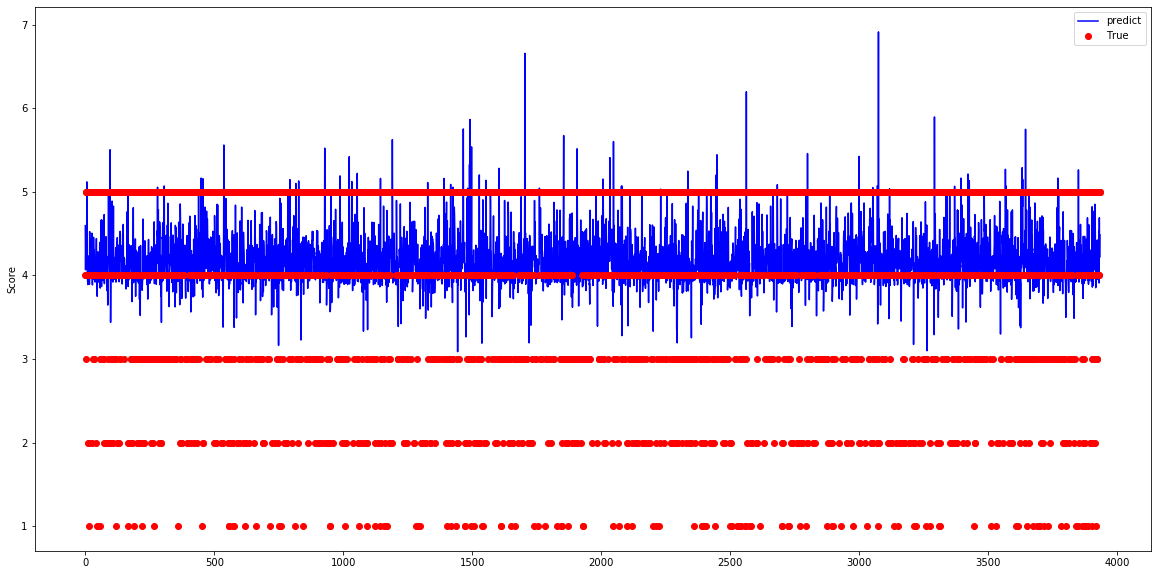

In [86]:
#remove the row with na
data = data.dropna(how='any')
#Estabblish the score column of title according to the emotion method
scorelist = []
for i in data['Title']:
    scorelist.append(emotion(i))
data['Score'] = scorelist

X=data.loc[:,('Score','Age')]
y=data.loc[:,'Rating']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
#establish  linear regression model
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
#show the interception of the model
print ('the interception of the model is ')
print(linreg.intercept_)
#show the coefficient of the model
feature_cols = ['Score','Age','Rating']
B=list(zip(feature_cols,linreg.coef_))
print('the coefficients of the variables are')
print(B)
print('The model is')
print('Rating = 3.79181583772207 + 0.10554746682283642*Score + 0.003764863902239304*Age')
#predict y according to the model I construct
y_pred = linreg.predict(X_test)
#to evaluate the degree of fit of the equation, I use Root Mean Squared Error(RMSE)
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred)) 
print ("RMSE:",sum_erro)
#ROC plot
plt.figure(figsize = (20,10))
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'ro',label="True")
plt.legend(loc="upper right")
plt.ylabel('Score')
plt.show()

The model is :Rating = 3.79181583772207 + 0.10554746682283642*Score + 0.003764863902239304*Age               
RMSE: 1.0700301090908038                                                                                     
So the model does not fit very well.

## Task 2 - Analysing transportation data

In this task, you should analysing the cycling trips in Edinburgh in September 2019 collected in `cyclingtrips_Sep2019.csv`. This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). You can extend your analysis to other months by downloading data from [this link](https://edinburghcyclehire.com/open-data/historical). 

As a part of this task you should visualise some aspects of the data geographically on a map. There are several different libraries and packages that you can use for this purpose. Below, I walk you through the installation and the basic usage of **folium**, but you are welcome to use any other geographical visualisation tools like `googlemaps` and `gmplot`. You can also find more about the folium library [here](https://python-visualization.github.io/folium/) and implement more advanced features of it in your project.

First, you need to install the library before importing it. The following cell does it for you in `Noteable` or a regular `Jupyter Notebook`:
 

In [11]:
import sys
!{sys.executable} -m pip install folium

Once you installed folium, you should import it and give it a starting coordinate

In [4]:
import folium

m = folium.Map(
    location=[55.924550, -3.176920],
    zoom_start=15
)

In the cell above, I gave the latitude and longitude of Murchison House as the starting location to folium. I also set the initial zoom to 15. You can change this coordinate as well as the zooming and observe the results. To display the map in a Jupyter notebook, you just need to ask for the object representation (simply typing `"m"` for the above map):

In [5]:
m

I can mark the Murchison House on the map by a circle with `radius=50`

In [7]:
folium.CircleMarker(
    location=[55.924550, -3.176920],
    radius=50,
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)

m

Using this tool, we want to visualise how busy the stations are as destinations or starting points of cycling trips. After dividing the cycling trips into morning and afternoon/evening trips, show how many of them end in or start from a particular station. You can do this by drawing a radius proportional to the number of trips. You can also separate the stations as destinations or starting points by drawing them on different maps or by colour-coding them.

Just like the first task, this is an open-ended problem. You can address the following or any other interesting questions about bike trips:

- What was the average journey time and distance of bike trips on weekdays? What about weekends?
- What was the most common time(s) of day for journeys to be undertaken?
- Which areas do you suggest for building the new stations based on your analysis?
- Can you visualise which stations were used mostly for shorter trips and which one for longer trips?
- Can you compare the statistics of different months in summer? Is there any remarkable difference between them?

There is more open data available for other cities - here is the link for the data on the similar bike hire scheme in London ([TFL open data](https://cycling.data.tfl.gov.uk)), and for New York [here](https://www.citibikenyc.com/system-data). You could also think about some of the issues involved in other cities and bike share schemes, and perform similar sorts of analyses or comparisons. For example:

- Do bike hire schemes share popular times of day?
- Can you trace the common commute patterns of different cities? Are there any commonalities of shape or structure to the patterns?
- How does the average rental time compare across different cities? How does that time change as the size of the city changes?

Divided the data into three different time periods: morning (4am-12pm), afternoon(12pm-8pm) and evening(8pm-4am). Then generated three maps according to different time periods.  

There are different colors (mainly includes red, blue and white) and different sizes of circles on the map, corresponding to each different trip station. We use colors and size of circles to intuitively distinguish the busy degree of each station:

The busier the station, the redder the circle; on the contrary, the less busy the station, the bluer the circle. The middle of the degree of busyness is shown as close to white circles. Similarly, the busier the station, the larger the corresponding circle; on the contrary, the smaller the corresponding circle. Through the comparison of the three maps, we can analyse some interesting questions.

Note: Click the icon on each station , it can show the station name.

In [13]:
import folium
import pandas as pd
import matplotlib
from matplotlib import cm

def make_mark(cyc_trip, color_type = "seismic"):
    """
    cyc_trip: data
    color_type: colormap's type, e.g "seismic", "spring", "Wistia" .etc.
    It will circle on the map based on the cyc_trip data
    
    """
    
    #rename the dataframe's index
    cyc_trip.index = range(cyc_trip.shape[0])
    
    # get repeated times of particular stations in each time period
    rep_t = get_trip_dict(cyc_trip) 

    # get the maximum repeated times
    max_t = max(rep_t.values())
    
    #get the most busy station ID: find the keys by values.
    place_ID = list(rep_t.keys())[list(rep_t.values()).index(max_t)]
    
    # set the most busy place as the center of the map
    center_lat = cyc_trip.loc[cyc_trip["start_station_id"] == place_ID , "start_station_latitude"].values[0]
    center_lon = cyc_trip.loc[cyc_trip["start_station_id"] == place_ID , "start_station_longitude"].values[0]
    map = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=14)
    
    for keys, values in rep_t.items():
        #get latitude, longitude and station name
        if keys in ["start_station_id"]:
            lat = cyc_trip.loc[cyc_trip["start_station_id"] == keys , "start_station_latitude"].values[0]
            lon = cyc_trip.loc[cyc_trip["start_station_id"] == keys , "start_station_longitude"].values[0]
            stat_name = cyc_trip.loc[cyc_trip["start_station_id"] == keys , "start_station_name"].values[0]
        else:     
            lat = cyc_trip.loc[cyc_trip["end_station_id"] == keys , "end_station_latitude"].values[0]
            lon = cyc_trip.loc[cyc_trip["end_station_id"] == keys , "end_station_longitude"].values[0]
            stat_name = cyc_trip.loc[cyc_trip["end_station_id"] == keys , "end_station_name"].values[0]
        
        #set the maximum radius to 50
        r = values / (max_t / 50)
        
        # set a colormap with color_type, 100 means color range
        colormap = cm.get_cmap(color_type, 100)
        #Denominator should be greater than molecule so that the value is always less than 1
        #Because the value 1 corresponding to color blue not red
        rgb = colormap(values/(max_t+1))[:3]
        #transfer the rgb value to hex value so that it can be used in folium 
        color = matplotlib.colors.rgb2hex(rgb)
    
        # make circle
        folium.CircleMarker(
            location=[lat, lon],
            radius=r,
            color=color,
            fill = True,
            fill_color = color
        ).add_to(map)
        
        #make icon in the particular station and show the station name
        folium.Marker(
            location = [lat, lon],
            popup='<i>' + stat_name + '</i>',
            tooltip="Click me!"
        ).add_to(map)
        
    return map


def get_trip_dict(cyc_trip):
    """
    If the ID of start point or end point appear the first
    time, make a new key, otherwise record repeated times.
    
    """
    rep_t ={} # record repeated times
    for i in range(cyc_trip.shape[0]):
        st_pos_id = cyc_trip.at[i , "start_station_id"]
        end_pos_id = cyc_trip.at[i , "end_station_id"]
        
        if st_pos_id not in rep_t.keys():
            rep_t[st_pos_id] = 1
        else:
            rep_t[st_pos_id] += 1

        if end_pos_id not in rep_t.keys():
            rep_t[end_pos_id] = 1
        else:
            rep_t[end_pos_id] += 1

    return rep_t
    
def div_data(data):
    """
    This function will divide data into three subdata, which are morning,afternoon and evening.
    Assuming that 4am-12am is morning data, 12am-8pm is afternoon data and 8pm-4am is evening data.
    
    """
    #use pd.Timestamp().time() to make the time as the same type of pd.to_datetime().dt.time
    mor = [pd.Timestamp("04:00:00.000000").time(), pd.Timestamp("12:00:00.000000").time()]
    aft = [pd.Timestamp("12:00:00.000000").time(), pd.Timestamp("20:00:00.000000").time()]
    eve = [pd.Timestamp("20:00:00.000000").time(), pd.Timestamp("04:00:00.000000").time()]
    # code before and after "&" need "()" because "&" has higher precedence than "==".
    mor_data = data.loc[(pd.to_datetime(data["started_at"]).dt.time < mor[1]) & \
                        (pd.to_datetime(data["started_at"]).dt.time >= mor[0])]
    aft_data = data.loc[(pd.to_datetime(data["started_at"]).dt.time < aft[1]) & \
                        (pd.to_datetime(data["started_at"]).dt.time >= aft[0])]
    eve_data = data.loc[(pd.to_datetime(data["started_at"]).dt.time < eve[1]) | \
                        (pd.to_datetime(data["started_at"]).dt.time >= eve[0])]
                                
    return mor_data,aft_data,eve_data

# load the data
cyc_trip = pd.read_csv("cyclingtrips_Sep2019.csv")

# divide data into 3 piece of day
mor_data, aft_data, eve_data = div_data(cyc_trip)

#make marks
mor_map = make_mark(mor_data)
aft_map = make_mark(aft_data)
eve_map = make_mark(eve_data)

In [20]:
'''
This is the morning map. First enter the map, with the busiest area(St Andrew Square) as the center of the map. 

'''
mor_map

In [10]:
'''
This is the afternoon map. First enter the map, with the busiest area (Portobello) as the center of the map. 

'''
aft_map

In [10]:
'''
This is the evening map. First enter the map, with the busiest area (Dundee Terrace) as the center of the map. 

'''
eve_map

We could see some busier(redder/bigger circles) stations clearly on the map, so the first question come up to our mind: 
Which is the busiest time period among morning time, afternoon time and evening time in Edinburgh? (Based on the data Sep.2019)

In order to answer it, we calculated the sum of the trip times based on three time perids. Through the comparison, we could find out the busiest time and the amount of people in this time.

In [27]:
trip_times = {"morning": mor_data.shape[0],
              "aftertoon": aft_data.shape[0],
              "evening": eve_data.shape[0]}
busy_time = list(trip_times.keys())[0]
busy_value = list(trip_times.values())[0]
for time, value in trip_times.items():
    if value > busy_value:
        busy_value = value
        busy_time = time
print("The most busy time of a day is", busy_time, "and the amount of people in this time is", busy_value, ".")

The most busy time of a day is aftertoon and the amount of people in this time is 7938 .


Now we have already known the busiest time period is afternoon with 7938 people, next we are curious about what was the most common time(s) of a day for journeys during the busiest time(afternoon).

Therefore, we divided afternoon time into four different time periods (12am-2pm, 2pm-4pm, 4pm-6pm, 6pm-8pm), and set each two continuous hours to become a time slot and found the answer.

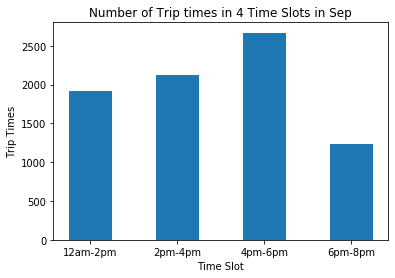

In [30]:
def div_data1(data, time):
    """
    this function will take the data and return the devided data in 4 time slots
    """
    if time == "morning":
        time_slot1 = [pd.Timestamp("04:00:00.000000").time(), pd.Timestamp("06:00:00.000000").time()]
        time_slot2 = [pd.Timestamp("06:00:00.000000").time(), pd.Timestamp("08:00:00.000000").time()]
        time_slot3 = [pd.Timestamp("08:00:00.000000").time(), pd.Timestamp("10:00:00.000000").time()]
        time_slot4 = [pd.Timestamp("10:00:00.000000").time(), pd.Timestamp("12:00:00.000000").time()]
    elif time == "afternoon":
        time_slot1 = [pd.Timestamp("12:00:00.000000").time(), pd.Timestamp("14:00:00.000000").time()]
        time_slot2 = [pd.Timestamp("14:00:00.000000").time(), pd.Timestamp("16:00:00.000000").time()]
        time_slot3 = [pd.Timestamp("16:00:00.000000").time(), pd.Timestamp("18:00:00.000000").time()]
        time_slot4 = [pd.Timestamp("18:00:00.000000").time(), pd.Timestamp("20:00:00.000000").time()]
    elif time == "evening":
        time_slot1 = [pd.Timestamp("20:00:00.000000").time(), pd.Timestamp("22:00:00.000000").time()]
        time_slot2 = [pd.Timestamp("22:00:00.000000").time(), pd.Timestamp("24:00:00.000000").time()]
        time_slot3 = [pd.Timestamp("00:00:00.000000").time(), pd.Timestamp("02:00:00.000000").time()]
        time_slot4 = [pd.Timestamp("02:00:00.000000").time(), pd.Timestamp("04:00:00.000000").time()]
        
    data1 = data.loc[(pd.to_datetime(data["started_at"]).dt.time < time_slot1[1]) & \
                        (pd.to_datetime(data["started_at"]).dt.time >= time_slot1[0])]
    data2 = data.loc[(pd.to_datetime(data["started_at"]).dt.time < time_slot2[1]) & \
                        (pd.to_datetime(data["started_at"]).dt.time >= time_slot2[0])]
    data3 = data.loc[(pd.to_datetime(data["started_at"]).dt.time < time_slot3[1]) & \
                        (pd.to_datetime(data["started_at"]).dt.time >= time_slot3[0])]
    data4 = data.loc[(pd.to_datetime(data["started_at"]).dt.time < time_slot4[1]) & \
                        (pd.to_datetime(data["started_at"]).dt.time >= time_slot4[0])]
    
    return data1, data2, data3, data4

# justify which time slot is busiest of one time period
ts1, ts2, ts3, ts4 = div_data1(aft_data, "afternoon")
fig, ax = plt.subplots()
x = ["12am-2pm", "2pm-4pm", "4pm-6pm", "6pm-8pm"]
y = [len(ts1), len(ts2), len(ts3), len(ts4)]
rects1 = ax.bar(x, y, width = 0.5)
ax.set_xlabel("Time Slot")
ax.set_ylabel("Trip Times")
ax.set_title("Number of Trip times in 4 Time Slots in Sep")
plt.show()

Now, we have already known the busiest time is 4pm and 6pm. After that, We have a stronger curiosity:

What was the most common times of day for journeys to be undertaken in Edinburgh?

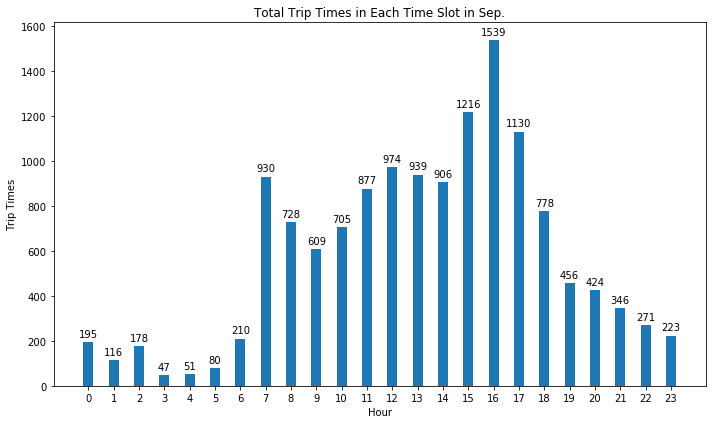

In [29]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

# load the data
cyc_trip = pd.read_csv("cyclingtrips_Sep2019.csv")

data = cyc_trip
data.started_at = pd.to_datetime(data.started_at)
#calculate the trip times in each time slot by grouping the hour
groupby_hour = data.groupby(data.started_at.dt.hour).size()


x = np.arange(len(groupby_hour))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure(2, [10, 6])
ax = fig.add_subplot(111)
rects1 = ax.bar(x, groupby_hour, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trip Times')
ax.set_xlabel("Hour")
ax.set_title('Total Trip Times in Each Time Slot in Sep.')
ax.set_xticks(x)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()

We used 1 hour as time units and calculated total trip times of each time units in Edinburgh (Based on data Sep.2019). Through the chart it can be summarized some characters:

(1). Just as we mentioned before, the busiest time is afternoon, which is reasonable. Many people prefer to go to trips in the afternoon after 
a cozy morning of waking up naturally and back home to eat dinner. Also, mostly the weather will be much warmer in the afternoon, so normally it is more comfortable to go out in the afternoon.

(2). We can easily find the daytime is the common time for people to go out as it is very obvious the total trip time from 7am to 18pm is much greater than that from 19pm-6am. We think this is common sense and the data can prove it.

(3). In the time interval where the number of trips is relatively small, there are also great differences between before 0 o'clock and after 0 o'clock. After 0 o'clock, there was a marked decline (from over 220 to less than 195) in the number of trips. It is pretty normal as most people should be asleep after 0 o'clock. When at 3 o 'clock, it is the lowest value of the day. After 6 o'clock, people gradually show up in the morning. 

(4). If we connect the midpoint of each bar to a broken line, this line is essentially follow the left-skew distribution: the data points cluster more toward one side of the scale than the other, creating a curve that is not symmetrical. The period with the largest trip times (16pm) is larger than the trip times in the middle period time (11am).


We can also easily observe some characters from the three maps. So we got into some specific stations.

(1)Several stations with very obvious changes in different time periods on the map: such as Victoria Quay, Potobello, and Constitution Street；As all three places are close to Firth of Forth, people like to have fun or hang out there in the daytime, so after 8pm, it is not busy at all.

(2)Some stations which always keep busy, such as St Andrew Square, Bristo Square, Meadows East; These stations seem to be located at the very core location of the new town and the old town, therefore, it is reasonable they kept busy all the time. 

(3).Also we still observed some stations just become busier in the evening such as Dundee Terrace and Lothian Road. Perhaps many people need to commmute back. 

As we can easily observed these stations on the map, so we calculate the trip times of the station above in Edinburgh (based on Sep.2019).


In [35]:
def get_int_trip_time(data, name):
    """
    data: input data
    name: the name of interested station
    this function will take the data and return the repeated station times of interested station
    """
    #rename the dataframe's index
    data.index = range(data.shape[0])
    
    # get repeated times of particular stations in each time period
    rep_t = get_trip_dict(data)
    
    dict = {}
    for n in name:
        if any(data["start_station_name"].str.match(n)):
            id = data.loc[data["start_station_name"].str.match(n) , "start_station_id"].values[0]
        else:
            id = data.loc[data["end_station_name"].str.match(n) , "start_station_id"].values[0]
        dict[n] = rep_t[id]
    
    return dict
    
#list the interested name of station
int_sta = ["Victoria Quay", "Portobello", "Constitution Street",
           "St Andrew Square", "Bristo Square", "Meadows East",
           "Dundee Terrace", "Lothian Road"]
mor_int_time = get_int_trip_time(mor_data, int_sta)
aft_int_time = get_int_trip_time(aft_data, int_sta)
eve_int_time = get_int_trip_time(eve_data, int_sta)
time_list = []
int_time = [mor_int_time, aft_int_time, eve_int_time]
for time in int_time:
    time_list.append([x for x in time.values()])
print("{:<20} {:<15} {:<15} {:<15}".format('Station', 'Morning', "Afternoon", "Evening"))
for i in range(8):
    label = int_sta[i]
    num1 = time_list[0][i]
    num2 = time_list[1][i]
    num3 = time_list[2][i]
    print("{:<20} {:<15} {:<15} {:<15}".format(label, num1, num2, num3))

Station              Morning         Afternoon       Evening        
Victoria Quay        221             355             43             
Portobello           240             720             63             
Constitution Street  206             458             88             
St Andrew Square     323             537             157            
Bristo Square        293             546             165            
Meadows East         320             531             119            
Dundee Terrace       218             406             167            
Lothian Road         132             307             141            


Now that we know about several stations of interest, we are beginning to consider whether these travel situations can divided into long trips and short trips and the use of long trips and short trips of these stations.

Therefore, we set 2 kilometers as a boundry value, if the distances longer than 2 kilometers, we define it as longer trips; on the bounrdry, if it is equal or less than 2 kilometers, we define it as short trips. In order to see the optimal representation of the two stations, then visualise which stations were used mostly for shorter trips and which one for longer trips.

Note: Move the mouse over the icon on the map to display the results.

In [13]:
import folium
import pandas as pd
import numpy as np

def dist(data):
    """
    take the data and it will return the distance based on lat and lon
    """
    
    # approximate radius of earth in km
    R = 6373.0
    # convert the degree to radians
    lat1 = np.radians(data["start_station_latitude"])
    lat2 = np.radians(data["end_station_latitude"])
    lon1 = np.radians(data["start_station_longitude"])
    lon2 = np.radians(data["end_station_longitude"])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    #distance fomula based on lat and lon
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

def div_data3(data):    
    short_dat = data.loc[data["distance"] <= 2]
    long_dat = data.loc[data["distance"] > 2]
    
    return short_dat, long_dat

#get the short distance data and longer distance data
cyc_trip = pd.read_csv("cyclingtrips_Sep2019.csv")
distance = dist(cyc_trip)
cyc_trip["distance"] = distance
short_data, long_data = div_data3(cyc_trip)

#get the most common station in both data
c1 = short_data.groupby(short_data.start_station_name).size()
c2 = short_data.groupby(short_data.end_station_name).size()
c = c1 + c2
pop_name_s = c.sort_values(ascending = False).index[0]
lat_s = short_data.loc[short_data["start_station_name"].str.match(pop_name_s),
                                   "start_station_latitude"].values[0]
lon_s = short_data.loc[short_data["start_station_name"].str.match(pop_name_s),
                                   "start_station_longitude"].values[0]

c3 = long_data.groupby(long_data.start_station_name).size()
c4 = long_data.groupby(long_data.end_station_name).size()
cl = c3 + c4
pop_name_l = cl.sort_values(ascending = False).index[0]
lat_l = long_data.loc[long_data["start_station_name"].str.match(pop_name_l),
                                   "start_station_latitude"].values[0]
lon_l = long_data.loc[long_data["start_station_name"].str.match(pop_name_l),
                                   "start_station_longitude"].values[0]

#--------plot the most commom station with distinctive marker-------------------------------

map = folium.Map(
        location=[lat_s, lon_s],
        zoom_start=13)

#make icon of busiest station in short trip
folium.Marker(
        icon = folium.Icon(color = "red",
                           icon = "flag"),
        location = [lat_s, lon_s],
        popup='<i>' + pop_name_s + '</i>',
        tooltip="I am the busiest in shorter trip"
).add_to(map)

#make icon of busiest station in long trip
folium.Marker(
        icon = folium.Icon(icon = "star",
                           color = "red"),
        location = [lat_l, lon_l],
        popup='<i>' + pop_name_l + '</i>',
        tooltip="I am the busiest in longer trip"
).add_to(map)
#-------------------------------------------------------------------------------------------
map


After the analysis above, now we would like to make a horizontal comparison and take a look at what is difference in June, July, August and September in Edinburgh. We are going to compare the average jouney time and distance of bike trips on weekdays and weekends based on these three months.


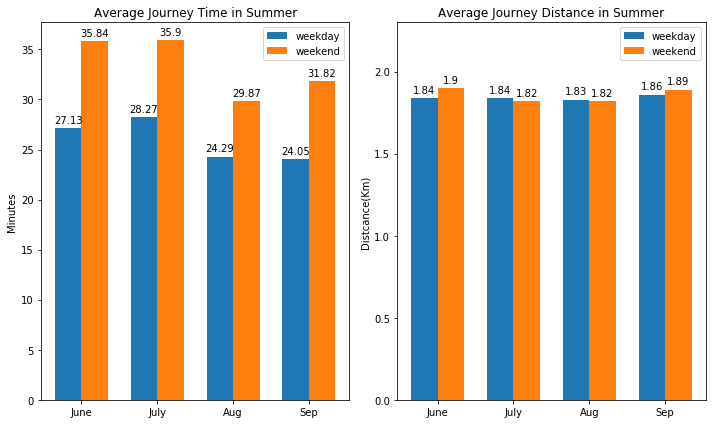

In [32]:
def div_data(data):
    """
    Given the data and devide the data into weekday and weekend
    """
    data["dayofweek"] = pd.to_datetime(data["started_at"]).dt.dayofweek
    weekday_dat = data.loc[(data["dayofweek"] > 0) & (data["dayofweek"] < 6)]
    weekend_dat = data.loc[data["dayofweek"] // 5 > 0]
    
    return weekday_dat, weekend_dat

def ave_dis(data):
    """
    take the data and it will return the aveage distance
    """
    
    # approximate radius of earth in km
    R = 6373.0
    # convert the degree to radians
    lat1 = np.radians(data["start_station_latitude"])
    lat2 = np.radians(data["end_station_latitude"])
    lon1 = np.radians(data["start_station_longitude"])
    lon2 = np.radians(data["end_station_longitude"])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    #distance fomula based on lat and lon
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return sum(distance) / len(distance)

def get_ave_dist_and_time(filename):
    """
    Given the file name and return the average distance and average trip time in weekday and weekend
    """
    # load the data
    cyc_trip = pd.read_csv(filename)

    #devide the data into weekend data and weekday data
    weekday_data, weekend_data = div_data(cyc_trip)
    #calculate the average time (in minutes) and distance of bike trips in both keekday and weekend
    ave_time_weekday = sum(weekday_data["duration"] / len(weekday_data["duration"])) / 60
    ave_time_weekend = sum(weekend_data["duration"] / len(weekend_data["duration"])) / 60
    #calculate the average distance based on lat and lon (in Km)
    ave_dis_weekday = ave_dis(weekday_data)
    ave_dis_weekend = ave_dis(weekend_data)
    
    return ([round(ave_time_weekday, 2), round(ave_time_weekend, 2)],
            [round(ave_dis_weekday, 2), round(ave_dis_weekend, 2)])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Sep_time, Sep_dist = get_ave_dist_and_time("cyclingtrips_Sep2019.csv")
Aug_time, Aug_dist = get_ave_dist_and_time("08.csv")
Jul_time, Jul_dist = get_ave_dist_and_time("07.csv")
June_time, June_dist = get_ave_dist_and_time("06.csv")

labels = ["June", "July", "Aug", "Sep"]
time_weekday = [June_time[0], Jul_time[0], Aug_time[0], Sep_time[0]]
time_weekend = [June_time[1], Jul_time[1], Aug_time[1], Sep_time[1]]
dist_weekday = [June_dist[0], Jul_dist[0], Aug_dist[0], Sep_dist[0]]
dist_weekend = [June_dist[1], Jul_dist[1], Aug_dist[1], Sep_dist[1]]

#---------------------------plot the data-----------------------------------------

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig =  plt.figure(1, [10, 6])
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
rects1 = ax.bar(x - width/2, time_weekday, width, label='weekday')
rects2 = ax.bar(x + width/2, time_weekend, width, label='weekend')
rects3 = ax1.bar(x - width/2, dist_weekday, width, label='weekday')
rects4 = ax1.bar(x + width/2, dist_weekend, width, label='weekend')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Minutes')
ax.set_title('Average Journey Time in Summer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax1.set_ylabel("Distcance(Km)")
ax1.set_title('Average Journey Distance in Summer')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylim([0, 2.3])
ax1.legend()

#add label above bars
autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax1)
autolabel(rects4, ax1)

fig.tight_layout()

plt.show()
#----------------------------------------------------------------------------------

As can be seen from the chart on the left above (Average Journey Time):

(1). The average journey time on weekends is longer than that on weekdays in all June, July, August and September as on weekends people have much more spare time to have fun and go out with friends or families, also, because there is no work so longer trip is more accepted on weekends.

(2). In contrast, the journey time of weekday and weekend in June and July is both longer than that in August and September. In June and July, weather will be good and people prefer to go trips. In August, the biggest event in Edinburgh is Edinbrugh International Festival, which is the World's Greatest Arts Festival. We guess people are all focused on the festival and there are many tourisits, so the number of people using bikes will dramatically increase that the average journey time is decrease compared with June and July. After August, the weather begins to cool down gradually and rain water increases, so average journey time keeps nearly the same with August including weekdays and weekends.

As can be seen from the chart on the right above (Average distance Time):

(3). In June, July, August and September, the sum of journey distances on weekdays and weekends is almost the same. All the data is from 1.82km to 1.89km. The fluctuation of the data does not exceed 0.07 kilometers. On weekdays, some people also need to use bike to commute, so although the time is lower than weekends, the distance keeps nearly the same. The stability of the data also reflects the relative fixation of people's way of life in another way.

We have already known the average jouney time and distance of bike trips on weekdays and weekends based on June, July, August and September,
Next we are going to narrow down the time frame and take a look at how people travel in Edinburgh in summer, combined with previous analysis. 

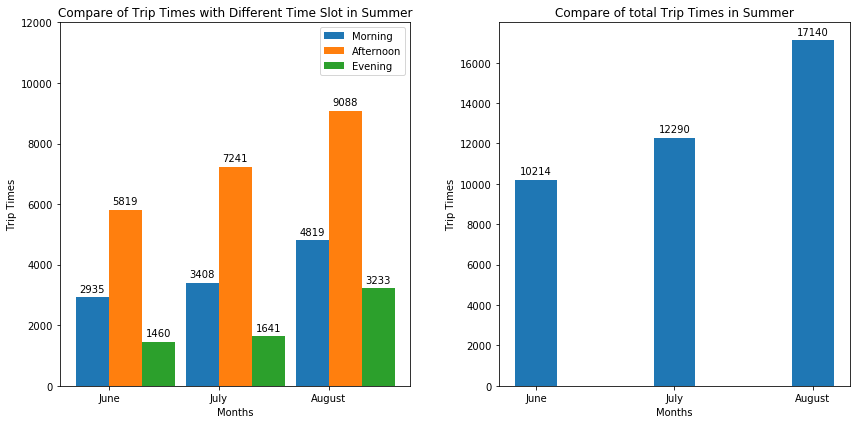

Five most popular stations in June are: ['Newkirkgate' 'Portobello' 'Canonmills' 'Victoria Quay' 'Bristo Square'] 

Five most popular stations in July are: ['Portobello' 'Bristo Square' 'St Andrew Square' 'Canonmills'
 'Victoria Quay'] 

Five most popular stations in August are: ['Bristo Square' 'Meadows East' 'St Andrew Square' 'Dundee Terrace'
 'Portobello'] 



In [36]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# load summer data
June_dat = pd.read_csv("06.csv")
July_dat = pd.read_csv("07.csv")
Aug_dat = pd.read_csv("08.csv")
Jnm, Jna, Jne = div_data(June_dat)
Jlm, Jla, Jle = div_data(July_dat)
Agm, Aga, Age = div_data(Aug_dat)

m = [len(Jnm), len(Jlm), len(Agm)]#number of people in different month in morning
a = [len(Jna), len(Jla), len(Aga)]
e = [len(Jne), len(Jle), len(Age)]

n = [June_dat.shape[0], July_dat.shape[0], Aug_dat.shape[0]]

#---------------------------plot the data--------------------------------------
labels = ["June", "July", "August"]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig =  plt.figure(4, [12, 6])
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
rects1 = ax.bar(x - width/2, m, width, label='Morning')
rects2 = ax.bar(x + width/2, a, width, label='Afternoon')
rects3 = ax.bar(x + width/2*3, e, width, label='Evening')

rects4 = ax1.bar(x, n, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Months')
ax.set_ylabel("Trip Times")
ax.set_title('Compare of Trip Times with Different Time Slot in Summer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 12000])
ax.legend(loc = "upper right")

ax1.set_xlabel('Months')
ax1.set_ylabel("Trip Times")
ax1.set_title('Compare of total Trip Times in Summer')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

#add label above bars
autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax)
autolabel(rects4, ax1)

fig.tight_layout()

plt.show()
#---------------------------------------------------------------------------------
#print 5 most popular stations in different months in summer
data06 = pd.read_csv("06.csv")
data07 = pd.read_csv("07.csv")
data08 = pd.read_csv("08.csv")
ca06 = data06.groupby(data06.start_station_name).size()
ce06 = data06.groupby(data06.end_station_name).size()
c06 = ca06.add(ce06, fill_value = 0)

ca07 = data07.groupby(data07.start_station_name).size()
ce07 = data07.groupby(data07.end_station_name).size()
c07 = ca07.add(ce07, fill_value = 0)

ca08 = data08.groupby(data08.start_station_name).size()
ce08 = data08.groupby(data08.end_station_name).size()
c08 = ca08.add(ce08, fill_value = 0)

print("Five most popular stations in June are:", 
      c06.sort_values(ascending = False).index.values[0:5], "\n")
print("Five most popular stations in July are:", 
      c07.sort_values(ascending = False).index.values[0:5], "\n")
print("Five most popular stations in August are:", 
      c08.sort_values(ascending = False).index.values[0:5], "\n")

The trip time in summer obey the pattern in September we analysed before, that is the largest number of people travel at noon, meanwhile the least at night. The data are in line with the rules of people's work and rest. The number of trips in summer is relatively high, especially in August, this can also explain once again why the average travel time in the previous August was less. As the total distance keeps the same, when the number of trips increases, average trip time decrease. A reasonable explanation is that in August, Edinburgh International Festival attracts many tourists from home and abroad leading to the increasing of the trip times. From the analysis of the five most popular stations in summer, we can find in June and July, people are more willing to go Portobello and in August, People takes bike more in Bristo Square, Meadows, St Andrew which are the center of Edinburgh. These place are also near to the Edinburgh International Festival. So our guess can be proved.



After a horizontal comparison of different months, we decided to return to the three maps themselves.We calculate the station in the top ten trip times and generate afternoon map(there are maximum people compared to the morning and evening)
to see where it is possible to build a new station to reduce the pressure at nearby stations and achieve the goal of diversion people.

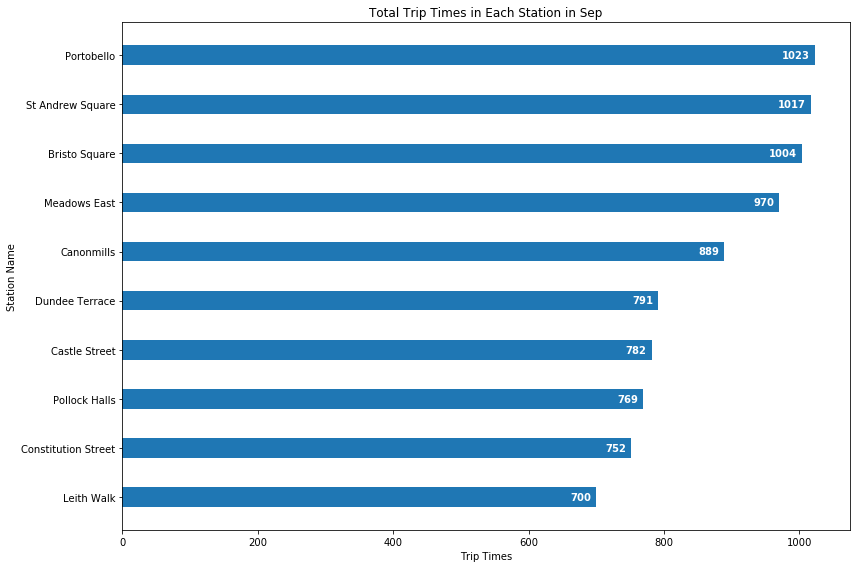

In [18]:
def autolabel_hor(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        xloc = -5
        clr = "white"
        align = "right"
        yloc = rect.get_y() + rect.get_height() / 2
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, yloc),
                    xytext=(xloc, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha=align, va='center',
                    color = clr, weight = "bold")
        
        
# load the data
cyc_trip = pd.read_csv("cyclingtrips_Sep2019.csv")

data = cyc_trip
# count the occurence of station name
count_start_station_name = data.groupby(data.start_station_name).size()
count_end_station_name = data.groupby(data.end_station_name).size()
count_station_name = count_end_station_name + count_start_station_name
N = 10 #only extract 10 station names

#--------------------plot the data-------------------------------------------------------
x = np.arange(10, 0, -1)  # the label locations
height = 0.4  # the width of the bars
fig = plt.figure(3, [12, 8])
ax = fig.add_subplot(111)
rects1 = ax.barh(x, count_station_name.sort_values(ascending = False)[0:N], height)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Station Name')
ax.set_xlabel("Trip Times")
ax.set_title('Total Trip Times in Each Station in Sep')
ax.set_yticks(x)
ax.set_yticklabels(count_station_name.sort_values(ascending = False).index[0:N])

# Add labels above bars
autolabel_hor(rects1)

# Make the plot fixed the figrue
fig.tight_layout()

plt.show()
#-----------------------------------------------------------------------------------------

General summary shown as below:

(1). Portobello Beach close to the forth and fifth, it is a beautiful beach to play and relax. Besides, there are a lot of residence living that area, hence, nearby residents and many tourists will go to the Portobello station, so it's not surprising it is the top one station. 

(2). Andrew Square is the core station of the new town and Bristow Square is the core station of the old town, so they both quite busy. The third one is Meadows east, which is located at the south of Bristow Square, near holyrood park and meadows lawns. It is the area of people's leisure and entertainment core activities. Canonmills is relatively north, most of which are local residents. 

Based on a comprehensive analysis of all the data and maps above, we suggest that a new station can be built in Lochend for the following reasons:

(1). It is located in the northwest of portobello, the busiest station, so it can effectively reduce the passenger flow at the Portobello station.

(2). It is also near the firth and forth, and there are many residence as well, thuns, the new station can provide convenience for many people.

(3). The north of the new station is famous for constitution street and dudley gardens, which can spread out tourists from northern station at the same time. 

(4). To the west, it is near leith walk station,canonmills station and st andrew square station, which are three of the busiest station in Edinburgh. Lochend is as the middle station can reduce the pressure from the northern and southern and western stations, and at the same time facilitate the surrounding residents. 

After analyzing the bike trips situations of Edinburgh, we are interested in other cities and then choose two large international cities, London and New York, for comparison (Based the data on July.2019). We choose the bike hire scheme in London and New York to compare the popular time of a day.

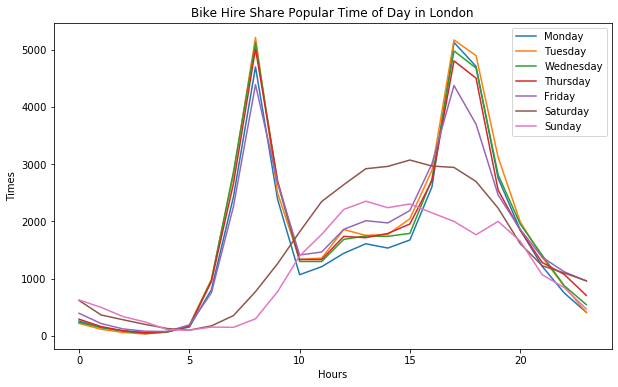

In [46]:
#load data
data = pd.read_csv("170JourneyDataExtract10Jul2019-16Jul2019.csv")
temp = pd.to_datetime(data["Start Date"], dayfirst = True).dt.day

tue_hour = pd.to_datetime(data.loc[temp == 16, "Start Date"]).dt.hour
wed_hour = pd.to_datetime(data.loc[temp == 10, "Start Date"]).dt.hour
thu_hour = pd.to_datetime(data.loc[temp == 11, "Start Date"]).dt.hour
fri_hour = pd.to_datetime(data.loc[temp == 12, "Start Date"]).dt.hour
sat_hour = pd.to_datetime(data.loc[temp == 13, "Start Date"]).dt.hour
sun_hour = pd.to_datetime(data.loc[temp == 14, "Start Date"]).dt.hour
mon_hour = pd.to_datetime(data.loc[temp == 15, "Start Date"]).dt.hour

#calculate the trip times in each time slot by grouping the hour
mon24 = mon_hour.groupby(mon_hour).size()
tue24 = tue_hour.groupby(tue_hour).size()
wed24 = wed_hour.groupby(wed_hour).size()
thu24 = thu_hour.groupby(thu_hour).size()
fri24 = fri_hour.groupby(fri_hour).size()
sat24 = sat_hour.groupby(sat_hour).size()
sun24 = sun_hour.groupby(sun_hour).size()

#--------plot, the data is from 2019.7.10 to 2019.7.16-------------------------
x = np.arange(0, 24)
fig = plt.figure(5, [10, 6])
ax = fig.add_subplot(111)
ax.plot(x, mon24, label = "Monday")
ax.plot(x, tue24, label = "Tuesday")
ax.plot(x, wed24, label = "Wednesday")
ax.plot(x, thu24, label = "Thursday")
ax.plot(x, fri24, label = "Friday")
ax.plot(x, sat24, label = "Saturday")
ax.plot(x, sun24, label = "Sunday")
ax.legend()
ax.set_xlabel("Hours")
ax.set_ylabel("Times")
ax.set_title("Bike Hire Share Popular Time of Day in London") 
plt.show()
#------------------------------------------------------------------------------


(1). The two most obvious peaks were from aournd 7am to 9am and 6pm to 8pm, and the number of cyclists significantly increased during these two periods, especially from Monday to Friday. From this we can conclude that the number of cyclists increased during commuting hours.

(2). From 10am to 3pm in the afternoon, the number of people who hired the car remained basically in a stable state, about 2000 people, which was almost the same on weekday. Thus it can be seen the pattern of people's life is relatively fixed, so the number of people using bikes is not fluctuates very much. 

(3). Before and after the five hours around the midnight, the number of cyclists remained at a very low level, around 500. It's reasonable as most people is resting during that time.

(4). The trend for the whole day is basically the same from Monday to Friday, and there would be a difference on Saturdays and Sundays. At the weekend, there was no obvious peak in the number of bike hirers, but it could be seen that there was an upward trend from 6am until 15pm, after that it began to decline gradually. We can see on weekends, people will be more concentrated in the afternoon to go out and hire bikes.

Overall, the trend of the data is in line with the normal schedule of most people.


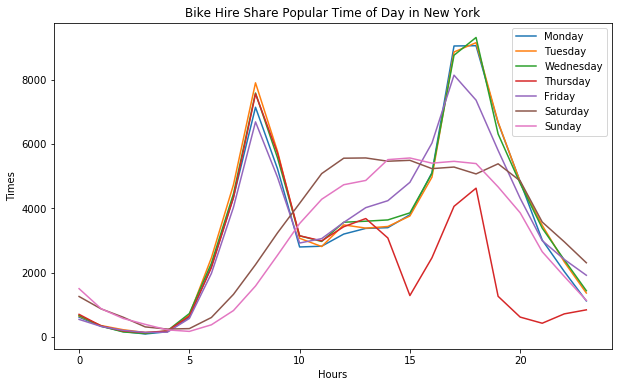

In [45]:
#load data
newyork_dat = pd.read_csv("201907-citibike-tripdata.csv")
temp = pd.to_datetime(newyork_dat["starttime"]).dt.day#store the converted time

tue_hour = pd.to_datetime(newyork_dat.loc[temp == 16, "starttime"]).dt.hour
wed_hour = pd.to_datetime(newyork_dat.loc[temp == 10, "starttime"]).dt.hour
thu_hour = pd.to_datetime(newyork_dat.loc[temp == 11, "starttime"]).dt.hour
fri_hour = pd.to_datetime(newyork_dat.loc[temp == 12, "starttime"]).dt.hour
sat_hour = pd.to_datetime(newyork_dat.loc[temp == 13, "starttime"]).dt.hour
sun_hour = pd.to_datetime(newyork_dat.loc[temp == 14, "starttime"]).dt.hour
mon_hour = pd.to_datetime(newyork_dat.loc[temp == 15, "starttime"]).dt.hour

#calculate the trip times in each time slot by grouping the hour
mon24 = mon_hour.groupby(mon_hour).size()
tue24 = tue_hour.groupby(tue_hour).size()
wed24 = wed_hour.groupby(wed_hour).size()
thu24 = thu_hour.groupby(thu_hour).size()
fri24 = fri_hour.groupby(fri_hour).size()
sat24 = sat_hour.groupby(sat_hour).size()
sun24 = sun_hour.groupby(sun_hour).size()

#--------plot, the data is also from 2019.7.10 to 2019.7.16--------------------
x = np.arange(0, 24)
fig = plt.figure(6, [10, 6])
ax = fig.add_subplot(111)
ax.plot(x, mon24, label = "Monday")
ax.plot(x, tue24, label = "Tuesday")
ax.plot(x, wed24, label = "Wednesday")
ax.plot(x, thu24, label = "Thursday")
ax.plot(x, fri24, label = "Friday")
ax.plot(x, sat24, label = "Saturday")
ax.plot(x, sun24, label = "Sunday")
ax.legend()
ax.set_xlabel("Hours")
ax.set_ylabel("Times")
ax.set_title("Bike Hire Share Popular Time of Day in New York") 
plt.show()
#------------------------------------------------------------------------------


(1). The two most obvious peaks were from aournd 7am to 9am and 6pm to 8pm, and the number of cyclists significantly increased during these two periods, especially from Monday to Friday except Thursday. Normally speaking, Thursday as one of the weekdays should the same as other weekdays, so after our investigation, we found that there was a massive power outage in Manhattan, New York, in July 2019, affecting about 75000 people. Therefore, we will guess this event influences the pattern of the bike hires and the whole analysis will not take into account the special circumstances of Thursday. We can conclude that the number of cyclists increased during commuting hours. This phenomenon is almost the same as London, however, the number of people in New York is much larger than London. 

(2). From 10am to 3pm in the afternoon, the number of people who hired the car remained basically in a stable state, about 3500 people, which was almost the same on weekday. Thus it can be seen the pattern of people's life is relatively fixed as well, so the number of people using bikes is not fluctuates very much on weekdays.

(3). Before and after the five hours around the midnight, the number of cyclists remained at a very low level, around 1000. It's reasonable as most people is resting during that time.

(4). The trend for the whole day is basically the same from Monday to Friday, and there would be a difference on Saturdays and Sundays. At the weekend, there was no obvious peak in the number of bike hirers, but it could be seen that there was an upward trend from 6am until 15pm, after that it began to decline gradually. We can see on weekends, people will be more concentrated in the afternoon to go out and hire bikes.

Overall, the trend of data lines in London and New York is basically the same if do not consider the accident of Thursday in New York. The most different is that the number of times people hire bikes in New York is normally larger than that in London. All the data can see the way people live, and the results are reasonable. 